<a href="https://colab.research.google.com/github/pkehinde55/Movie_Recommedation/blob/main/12_9_Movie_Rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
**Names**: Henghak Kun,

# Setup


In [ ]:
# Versioning
!pip install pandas==1.1.5
!pip install -U scikit-learn
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Setup
import json
import glob
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import NearestNeighbors
import ast

Using User-defined distance https://stackoverflow.com/questions/21052509/sklearn-knn-usage-with-a-user-defined-metric
Distance Metric doc: https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree       
Reading state infor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/Shareddrives/519_Project/new_datasets

/content/drive/Shareddrives/519_Project/new_datasets


# Import Datasets and Visualise Dataset Properties


In [ ]:
netflix_titles_df = pd.read_csv("/content/drive/Shareddrives/519_Project/new_datasets/netflix_titles.csv")
netflix_credits_df = pd.read_csv("/content/drive/Shareddrives/519_Project/new_datasets/netflix_credits.csv")

hulu_titles_df = pd.read_csv("/content/drive/Shareddrives/519_Project/new_datasets/hulu_titles.csv")
hulu_credits_df = pd.read_csv("/content/drive/Shareddrives/519_Project/new_datasets/hulu_credits.csv")

disney_titles_df = pd.read_csv("/content/drive/Shareddrives/519_Project/new_datasets/disney_titles.csv")
disney_credits_df = pd.read_csv("/content/drive/Shareddrives/519_Project/new_datasets/disney_credits.csv")

amazon_titles_df =  pd.read_csv("/content/drive/Shareddrives/519_Project/new_datasets/amazon_titles.csv")
amazon_credits_df =  pd.read_csv("/content/drive/Shareddrives/519_Project/new_datasets/amazon_credits.csv")

In [ ]:
tp = amazon_titles_df.dropna(subset=['title'])
tp.drop(['imdb_votes',  'imdb_id', 'tmdb_popularity' , 'tmdb_score', 'seasons' ], axis = 1, inplace = True)
print(amazon_titles_df.shape)
print(tp.shape)

(9871, 15)
(9871, 10)


In [ ]:
netflix_titles_df.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [ ]:
netflix_credits_df.head(5)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [ ]:
def plot_nas(dfs, platforms):
    # fig, ax = plt.subplots()
    for i in range(len(dfs)):
        if dfs[i].isnull().sum().sum() != 0:
            na_df = (dfs[i].isnull().sum() / len(dfs[i])) * 100
            na_df = na_df.drop(na_df[na_df == 0].index)
            missing_data = pd.DataFrame({platforms[i] :na_df})
            missing_data.plot(kind = "barh")
            plt.xlabel('NAN Ratio %')
        else:
            print('No NAs found')
    plt.show()

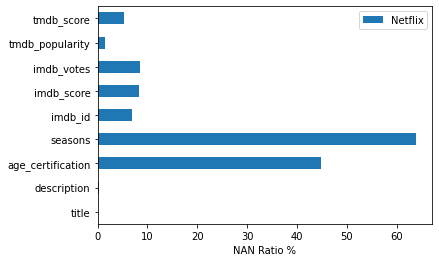

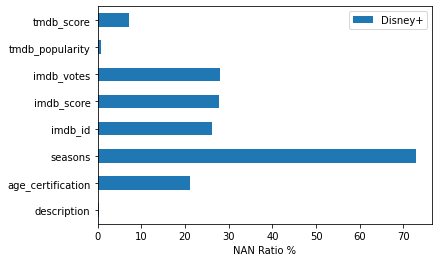

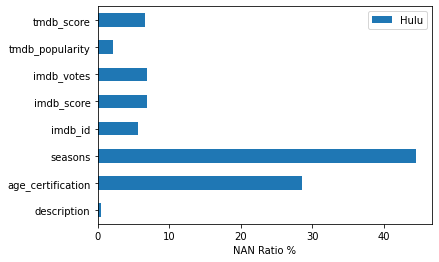

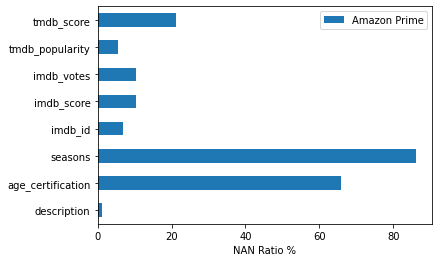

In [ ]:
plot_nas([netflix_titles_df, disney_titles_df, hulu_titles_df, amazon_titles_df], ['Netflix', 'Disney+', "Hulu", "Amazon Prime"])

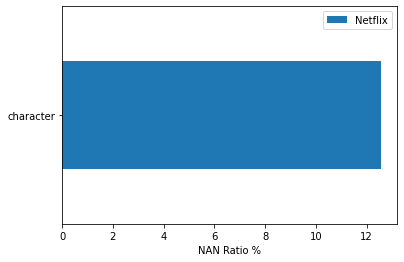

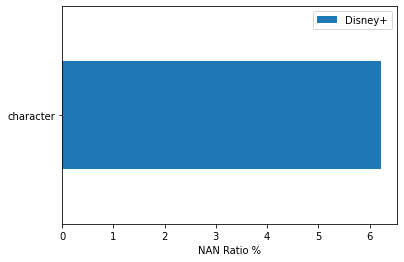

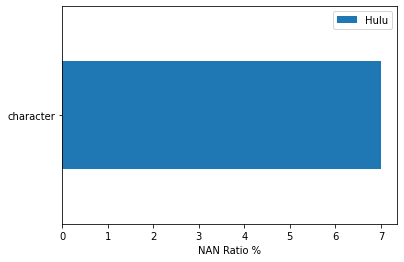

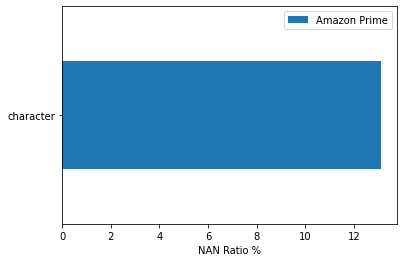

In [ ]:
plot_nas([netflix_credits_df, disney_credits_df, hulu_credits_df, amazon_credits_df], ['Netflix', 'Disney+', "Hulu", "Amazon Prime"])

In [ ]:
# check dropping nan values
print(amazon_titles_df.shape)
print(netflix_titles_df.shape)
print(hulu_titles_df.shape)
print(disney_titles_df.shape)

(9871, 15)
(5850, 15)
(2398, 15)
(1535, 15)


# Data Cleaning And Preprocessing


## Drop null values and extract the actors and directors from credit dataframes

In [ ]:
# print(amazon_titles_df.shape)
# tp = amazon_titles_df.dropna(subset=['title'])
# tp.drop(['imdb_votes',  'imdb_id', 'tmdb_popularity' , 'tmdb_score', 'seasons' ], axis = 1, inplace = True)
# print(tp.shape)

# credits_df = amazon_credits_df
# print(credits_df.shape)

# credits_actors = credits_df.loc[(credits_df['role'] == 'ACTOR')].groupby('id')['name'].apply(list).reset_index(name='Actors')
# print(credits_actors.shape)

# credits_directors = credits_df.loc[(credits_df['role'] == 'DIRECTOR')].groupby('id')['name'].apply(list).reset_index(name='Directors')
# print(credits_directors.shape)

# credits_workers = pd.merge(credits_actors,credits_directors,on='id')
# print(credits_workers.shape)

# tp_id = tp.id.tolist()
# cw_id = credits_workers.id.tolist()

# inter = np.intersect1d(tp_id, cw_id)
# print(inter.shape)


# merged = pd.merge(tp, credits_workers, on='id', how='left')
# print(merged.shape)

In [ ]:
from csv import DictReader
def merge_credits_titles(titles_df, credits_df):
  """
  We need title, type, description, release_year, age_certification, genres, production_countries

  drop movies/shows without a title
  """

  t = titles_df.dropna(subset=['title'])
  t.drop(['imdb_votes',  'imdb_id', 'tmdb_popularity' , 'tmdb_score', 'seasons'], axis = 1, inplace = True)
  credits_actors = credits_df.loc[(credits_df['role'] == 'ACTOR')].groupby('id')['name'].apply(list).reset_index(name='Actors')
#   print('credits_actors:\n', credits_actors)
  credits_directors = credits_df.loc[(credits_df['role'] == 'DIRECTOR')].groupby('id')['name'].apply(list).reset_index(name='Directors')
#   print('credits_directors:\n', credits_directors)
  credits_workers = pd.merge(credits_actors,credits_directors,on='id')
#   print('credits_workers:\n', credits_workers)
  merged = pd.merge(credits_workers,t,on='id')
#   print('merged:\n', merged)
  return merged


In [ ]:
netflix = merge_credits_titles(netflix_titles_df, netflix_credits_df)
hulu = merge_credits_titles(hulu_titles_df, hulu_credits_df)
disney = merge_credits_titles(disney_titles_df, disney_credits_df)
amazon = merge_credits_titles(amazon_titles_df, amazon_credits_df)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# check dropping nan values
print(amazon.shape)
print(netflix.shape)
print(hulu.shape)
print(disney.shape)

(7494, 12)
(3892, 12)
(1135, 12)
(1061, 12)


## Encode non-numerical features

In [ ]:
def encode_age_certification(age):
    if age == 'G':
      return 1
    elif age == 'PG-G':
        return 2
    elif age == 'PG':
        return 3
    elif age == 'TV-PG':
        return 4
    elif age == 'PG-13':
        return 5
    elif age == 'TV-14':
        return 6
    elif age == 'R':
        return 7
    elif age == 'TV-MA':
        return 8
    else: # Nan values
        return -1

def encode_type(title_type):
    if title_type == 'MOVIE':
        return 1
    else:
       return 0

def transform_feature(df, feature, function):
    df[feature] = df[feature].apply(function)


## Encode genres

In [ ]:
# rename type("MOVIE" or "SHOW") to title_type
netflix.rename(columns={'type' : 'title_type'}, inplace=True)
hulu.rename(columns={'type' : 'title_type'}, inplace=True)
amazon.rename(columns={'type' : 'title_type'}, inplace=True)
disney.rename(columns={'type' : 'title_type'}, inplace=True)

# transform features
transform_feature(netflix, 'age_certification', encode_age_certification)
transform_feature(netflix, 'title_type', encode_type)

transform_feature(hulu, 'age_certification', encode_age_certification)
transform_feature(hulu, 'title_type', encode_type)

transform_feature(amazon, 'age_certification', encode_age_certification)
transform_feature(amazon, 'title_type', encode_type)

transform_feature(disney, 'age_certification', encode_age_certification)
transform_feature(disney, 'title_type', encode_type)

## Input missing values

In [ ]:
def input_missing_values(df):
    """
    type release_year imdb_score runtime age_certification description genres Directors Actors
    """
    # df['type'].fillna(df['type'].mode()[0], inplace = True)
    # df['release_year'].fillna(df['release_year'].mode()[0], inplace = True)
    df['imdb_score'].fillna(df['imdb_score'].mean(), inplace = True)
    # df['runtime'].fillna(df['runtime'].mean()[0], inplace = True)
    # df['age_certification'].fillna(df['age_certification'].mode()[0], inplace = True)

    # df['description'] = df['description'].fillna(" ")
    # df['genres'] = df['genres'].fillna("").apply(list)
    # df['Directors'] = df['Directors'].fillna("").apply(list)
    # df['Actors'] = df['Actors'].fillna("").apply(list)

    df['description'].fillna(' ', inplace=True)
    df['genres'].fillna({i: [] for i in df.index}, inplace=True)
    df['Directors'].fillna({i: [] for i in df.index}, inplace=True)
    df['Actors'].fillna({i: [] for i in df.index}, inplace=True)

In [ ]:
input_missing_values(netflix)
input_missing_values(disney)
input_missing_values(hulu)
input_missing_values(amazon)

## Feature correlations in the movie dataframes

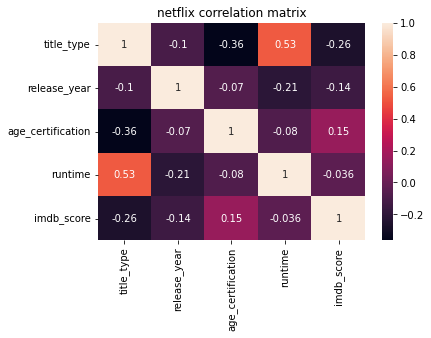

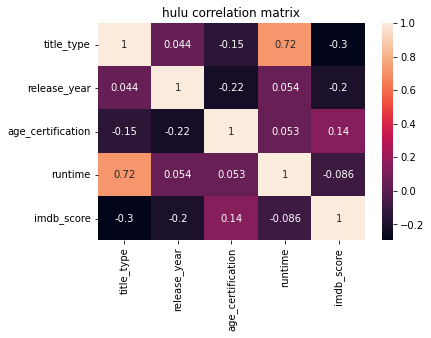

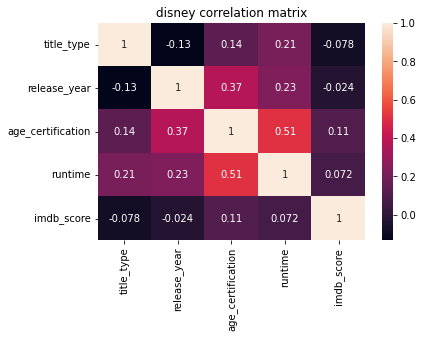

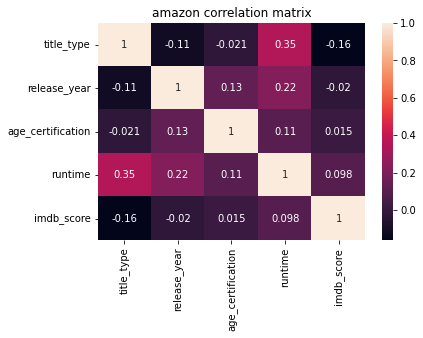

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

def get_correlation_plot(df, df_name):
    corr_matrix = df.corr()
    sn.heatmap(corr_matrix, annot=True).set(title= df_name + " correlation matrix")
    plt.show()

get_correlation_plot(netflix, "netflix")
get_correlation_plot(hulu, "hulu")
get_correlation_plot(disney, "disney")
get_correlation_plot(amazon, "amazon")

## Make the training dataframe (train_df)

### Add a streaming service column to all dataframes

In [ ]:
netflix = netflix.assign(streaming_service='netflix')
hulu = hulu.assign(streaming_service='hulu')
disney = disney.assign(streaming_service='disney')
amazon = amazon.assign(streaming_service='amazon')




### Concatenate all dataframes into one training dataframe

In [ ]:
train_solo_stream = pd.concat([netflix, hulu, disney, amazon])


# make streaming service column that makes sure
platforms = train_solo_stream.groupby(['title', 'release_year'])['streaming_service'].apply(list).reset_index(name='streaming_services')
train_df = pd.merge(train_solo_stream,platforms,on=['title', 'release_year']).drop_duplicates(subset=['title', 'release_year'], keep="first")
train_df.drop(['streaming_service'], axis = 1, inplace = True)

In [ ]:
train_df.dropna(inplace=True)
label_encoder = preprocessing.LabelEncoder()
train_df['id']= label_encoder.fit_transform(train_df['id'])

### get training features

In [ ]:
"""
["Actors", "Directors", "title_type", "description", "release_year", "age_certification", "runtime", "genres", "imdb_score"]
"""
train_features = train_df[["Actors", "Directors", "title_type", "description", "release_year", "age_certification", "runtime", "genres", "imdb_score"]]

print(train_features.shape)

(13364, 9)


## Encode genres

### compile a sorted list of all genres

In [ ]:
unique_genres = train_df.genres.unique().flatten()

genres = []
for ug in unique_genres:
    res =  ast.literal_eval(ug)
    genres.append(res)
genres = [g for genre in genres for g in genre]
genres = list(dict.fromkeys(genres))
genres.sort()
print(genres)

['action', 'animation', 'comedy', 'crime', 'documentation', 'drama', 'european', 'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi', 'sport', 'thriller', 'war', 'western']


### Convert the genres into a vector

In [ ]:
def encode_genre(genre):
    genre = ast.literal_eval(genre)
    genre.sort()
    idx = 0
    genre_vector = [0] * len(genres)
    for i in range(len(genres)):
        if idx >= len(genre):
            break
        if genre[idx] == genres[i]:
            idx += 1
            genre_vector[i] = 1

    return genre_vector



In [ ]:
# train_df.genres.apply(encode_genre)
# train_df

## Convert Actors and directors into strings

In [ ]:
# train_df.Directors.apply(lambda x : str(x))
# train_df.Actors.apply(lambda x : str(x))
# # train_df.production_countries.apply(lambda x : str(x))

# DISTANCE FUNCTIONS

## List distance

In [ ]:
def distance_of_list (x, y):

  x_array = np.asarray(x)
  y_array = np.asarray(y)
  weight_of_one_element_in_x = .5 / len(x_array)
  weight_of_one_element_in_y = .5 / len(y_array)

  intersect = np.intersect1d(x, y)
  remaining_x = len(x_array)- len(intersect)
  remaining_y = len(y_array) - len(intersect)

  return remaining_x * weight_of_one_element_in_x  + remaining_y * weight_of_one_element_in_y

In [ ]:
#TEST FOR DISTANCE OF LIST

x = ["A", "B", "C", "D", "E"]
y = ["A", "B", "C", "D", "E"]

#output should be 0

print(distance_of_list(x,y))


a = ["A", "B", "Y", "D", "E"]
b = ["A", "B", "Z", "D", "E"]

#output should be .2


print(distance_of_list(a,b))

c = ["A", "B", "D", "E"]
d = ["A", "B", "Z", "D", "E"]


print(distance_of_list(c,d))

#output should be . 1

f = ["G", "F", "J", "Y", "Q"]
g = ["A", "B", "Z", "D", "E"]

print(distance_of_list(f,g))

#OUTPUT SHOULD BE 1


0.0
0.2
0.1
1.0


## Descirption distance

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')

def description_distance(description1, description2):
    tfidf_matrix = tfidf.fit_transform([description1, description2])
    cos_sim = cosine_similarity(tfidf_matrix)
    return cos_sim[0][1]


## Distance Metric

In [ ]:
def distance_metric(movie_1, movie_2):
    """
    classification features: []
    """
    ""
    dist = 0;
    for x,y in zip(movie_1, movie_2):
        if type(x) is object:
          dist += distance_of_list(x, y)
        elif type(x) is str:
           dist += description_distance(x, y)
        else:
            dist += np.power(np.power(x, 2)+ np.power(y,2) , .5)

    return dist


# Fitting the data into a Nearest Neighbours Unsupervised learner

## Initialise the Nearest Neighbours Unsupervised learner

In [ ]:
#from sklearn import neighbors
#sc_x = StandardScaler()
#make an object for the NearestNeighbors Class.
#model_knn = NearestNeighbors(metric = distance_metric, algorithm='brute', n_neighbors=1, n_jobs=-1)
# fit the dataset
#model_knn.fit(train_df[['id', 'description']])
#x = [["string", 2, 3, 4], ["string2", 6, 7, 8]]
#model_knn.fit(train_df['description'])

#print(model_knn.kneighbors([[1., 1., 1., 1.]]))



#train_df = sc_x.fit_transform(train_df)
def distance_matrix():
num_rows = train_df.shape[0]
distances = np.zeros( (num_rows, num_rows) )

#filling 2D array with distance values
for i in range(num_rows):
  for j in range(num_rows):
    distances[i][j] = distance_metric(train_df.iloc[i], train_df.iloc[j])
return distances



In [ ]:
from sklearn import neighbors
def get_neighbors(movie_title, release_year):

  #get the movie

  row_number = train_df[(train_df['title'] == movie_title) & (train_df['release_year'] == release_year)].index[0]
  arr = distance_matrix()
  #  dist = arr[:,row_number + 1]
  #  distances = list()

  #  for i in range(train_df.shape[0]):
  #   distances.append(( i, dist))
  #   distances.sort(key=lambda tup: tup[1])

  #  neighbors = list()
  #  for i in range(11):
  #     #neighbors.append(distances[i][0])
  #     neighbors.append(train_df[distances[i]]['title'], train_df[distances[i]]['release_year'])

  dist = arr[row_number]
  neighbors = np.argmax(dist)


  return neighbors[0:11]

In [ ]:
print(get_neighbors('Taxi Driver', 1976))

Streaming output truncated to the last 5000 lines.
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE
HUUE

KeyboardInterrupt: ignored